# Prototipo app

## Configuración

In [10]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time 
import os
import cv2

# Drawring pad:
from ipycanvas_drawing import DrawingWidget
from IPython.display import display, Markdown, Latex

In [11]:
%%time
import sys
sys.path.append('/home/jovyan/work/databases/HASY/')
from hasy_tools_updated import *
X_test, y_test, symbol_id2index_test, index2symbol_id_test = load_database('/home/jovyan/work/databases/HASY/benat-data/test.csv')

symbolid2latex = get_symbolid2latex()

# Preprocess test data:
X_test = X_test/ 255.
y_test = y_test.astype(int)
X_test = X_test.reshape(X_test.shape[0],32,32)[..., np.newaxis]

CPU times: user 7.66 s, sys: 1.18 s, total: 8.84 s
Wall time: 8.85 s


In [3]:
# Exportar diccionario:
import pickle 

with open('index2symbol_id_test.pkl', 'wb') as f:
    pickle.dump(index2symbol_id_test, f)
    
with open('symbolid2latex.pkl', 'wb') as f:
    pickle.dump(symbolid2latex, f)
        
#with open('saved_dictionary.pkl', 'rb') as f:
#    loaded_dict = pickle.load(f)

In [ ]:
symbolid2latex.values()

### Funciones necesarias

In [12]:
def predict(drawing_widget, model, printlog=None):
    image_output = drawing_widget.get_image_data()
    img = ((image_output[:,:,-1]/255.0+1)%2).astype(dtype='uint8')
    res = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_AREA)

    X_mine = np.zeros((1, 32, 32))
    X_mine[0] = res
    X_mine = X_mine[..., np.newaxis]

    #y_pred = np.argmax(model.predict(X_mine, verbose=printlog), axis=-1)
    y_probs = model.predict(X_mine, verbose=printlog)
    y_pred = np.argmax(y_probs, axis=-1)
    
    return y_pred, y_probs, res

def get_fig_logdir():
    root_logdir = os.path.join(os.curdir, "figs_pruebas")
    run_id = time.strftime("fig_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

def print_preds(y_preds, probs, res, print_latex=True, save = False, n=3):    
    y_preds = np.argsort(y_probs, axis=1)[:,-n:]
    probs = 100*np.sort(y_probs, axis=1)[:,-n:]
    for i in range(len(y_probs)):
        latex = [symbolid2latex[index2symbol_id_test[k]] for k in y_preds[i][::-1]]
        if print_latex:
            print_str = f"Figure {i}:"
            for j in range(0,n):
                print_str += f"$\quad {latex[j]:15}\,${probs[i][-1-j]:.2f}%   "
            display(Markdown(print_str))
            #display(Markdown(f"Figure {i}: $\quad {latex[0]:15}\,${probs[i][-1]:.2f}% $\quad {latex[1]:15}${probs[i][-2]:.2f}%   $\quad {latex[2]:15}${probs[i][-3]:.2f}%"))
        else:
            print_str = f"Figure {i}: "
            for j in range(0,n):
                print_str += f"{latex[j]:15}{probs[i][-1-j]:.2f}% "
            print(print_str)
            #print(f"Figure {i}: {latex[0]:15}{probs[i][-1]:.2f}%   {latex[1]:15}{probs[i][-2]:.2f}%   {latex[2]:15}{probs[i][-3]:.2f}%")
        
        plt.figure(figsize=(7.2, 2.4))
        plt.axis('off')
        plt.title(f'{latex[0]}')
        plt.imshow(res, cmap="gray")
        if save:
            plt.savefig(get_fig_logdir())

## Modelos

### Modelo entrenado en la base de datos original

In [13]:
#keras.backend.clear_session()
#tf.random.set_seed(42)
#np.random.seed(42)

path_original = '/home/jovyan/work/models/04_CNN/00_MNIST_model/Test_performance/models/best_model.h5'
model_original_data = keras.models.load_model(path_original)

# Check its architecture
# model_original_data.summary()

In [ ]:
# Evaluación del modelo en el conjunto de test
# acc_orginal = model_original_data.evaluate(X_test, y_test, verbose=0)[1]
# print("TOP1 acc: ", acc_orginal)

### Modelo entrenado en la base de datos aumentada

In [14]:
path_aug = '/home/jovyan/work/models/05_CNN_aug/aug_CNN_4_layer_1000/models_aug/best_model.h5'
model_aug_data = keras.models.load_model(path_aug)

# Check its architecture
# model_original_data.summary()

In [ ]:
# Evaluación del modelo en el conjunto de test
# acc_aug = model_aug_data.evaluate(X_test, y_test, verbose=0)[1]
# print("TOP1 acc: ", acc_aug)

## Prototipo de la app

In [15]:
from ipycanvas_drawing import DrawingWidget
# from IPython.display import display, Markdown, Latex
DrawingWidget(200,200)

In [16]:
# Create a drawing widget
# You can set other setup parameters: background, alpha, default_style, default_radius
drawing_widget = DrawingWidget(width=200, height=200, background='#f5f5f5', default_radius=15) 
# Show the drawing widget
drawing_widget.show()

Predicciones del modelo con dataset original:


Figure 0:$\quad \beta          \,$69.72%   $\quad \ss            \,$8.02%   $\quad \xi            \,$5.77%   $\quad \zeta          \,$4.00%   $\quad \varrho        \,$3.50%   



Predicciones del modelo con dataset aumentado:
Figure 0: 3              88.12% \mathcal{B}    8.77% \ss            1.00% \beta          0.99% \rho           0.39% 


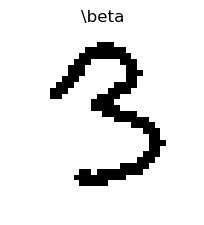

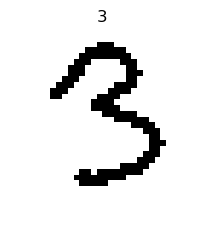

In [17]:
print("Predicciones del modelo con dataset original:")
y_pred, y_probs, res = predict(drawing_widget, model_original_data)
print_preds(y_pred, y_probs, res, print_latex=True, save=False, n=5)
#print_preds(y_pred, y_probs, res, print_latex=True)
print("\n")

print("Predicciones del modelo con dataset aumentado:")
y_pred, y_probs, res = predict(drawing_widget, model_aug_data)
print_preds(y_pred, y_probs, res, print_latex=False, save=False, n=5)